# Instala transformers 🐍

In [1]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

# Baixa corpus ⬇⬇⬇

In [2]:
import os
import zipfile
import pandas as pd

data_path = "data"
if not os.path.exists(data_path):
  # Baixa arquivo corpus.zip
  url = "https://raw.githubusercontent.com/AngryLeaderBB/NLP_class_2024/refs/" \
        "heads/main/Atividade_3/csvs.zip"
  cmd = ! wget {url}

  # Extrai corpus.zip na pasta corpus
  with zipfile.ZipFile("csvs.zip", 'r') as zip_ref:
      zip_ref.extractall(".")

  # Renomea a pasta csvs para data
  os.rename("csvs", data_path)

  # Exclui arquivo corpus.zip
  os.remove("csvs.zip")

csv_path = data_path + "/Dmoz-Health.csv"

# Carrega o csv no path csv_path
data = pd.read_csv(csv_path)
data.head()

,file_name,text,class
0,1578510.txt,Illinois Church Action on Alcohol and Addictio...,Addictions
1,1577747.txt,AA Statewide Meeting lists for all of Vermont....,Addictions
2,1578166.txt,Gracer Medical Group Dr. Richard Gracer is a p...,Addictions
3,1577381.txt,"Phoenix Meetings, events, and visitor informat...",Addictions
4,1578793.txt,American River Area Narcotics Anonymous Resour...,Addictions


# Divide o corpus em treino, validação e teste ➗

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset

# Tranforma class label para inteiro
label_encoder = LabelEncoder()
data['encoded_class'] = label_encoder.fit_transform(data['class'])


seed = 42

# Divide data em 70% treino, 20% teste, and 10% validação
train_texts, temp_texts,\
train_labels, temp_labels = train_test_split(data['text'], data['encoded_class'],
                                             test_size=0.3, random_state=seed)

val_texts, test_texts,\
val_labels, test_labels = train_test_split(temp_texts, temp_labels,
                                           test_size=2/3, random_state=seed)


Baixa data handler

In [4]:
import os

# Baixa o arquivo data_handler.py
if not os.path.exists("data_handler.py"):
  url = "https://raw.githubusercontent.com/AngryLeaderBB/NLP_class_2024/refs/" \
        "heads/main/Atividade_4/data_handler.py"
  cmd = ! wget {url}


Prepara dataset

In [5]:
from data_handler import *

# Cria datasets
train_dataset = DataHandler(train_texts.tolist(), train_labels.tolist())
val_dataset = DataHandler(val_texts.tolist(), val_labels.tolist())
test_dataset = DataHandler(test_texts.tolist(), test_labels.tolist())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

# Treina o Bert 🤖

In [ ]:
# Carrega modelo BERT para classificação
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels=data['encoded_class'].nunique())

# Treinamento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    evaluation_strategy="no",
    save_strategy="epoch",
    report_to="none",
    fp16=True,                       # Roda mais rápido
)


# Configura Trainer
trainer = Trainer(
    model=model,                     # modelo treinado
    args=training_args,              # argumentos de treino
    train_dataset=train_dataset,     # dataset de treino
    eval_dataset=val_dataset,        # avaliação de treino
)

# Treina modelo
trainer.train()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss
100,2.380800
200,1.160800
300,0.746400
400,0.713700
500,0.628900
600,0.469500
700,0.281400
800,0.329600
900,0.265300


Step,Training Loss
100,2.380800
200,1.160800
300,0.746400
400,0.713700
500,0.628900
600,0.469500
700,0.281400
800,0.329600
900,0.265300
1000,0.298300


TrainOutput(global_step=1138, training_loss=0.6688797821688527, metrics={'train_runtime': 8847.1937, 'train_samples_per_second': 1.029, 'train_steps_per_second': 0.129, 'total_flos': 425593328105400.0, 'train_loss': 0.6688797821688527, 'epoch': 2.0})

Avalia modelo

In [ ]:
# Avalia resultado do treino
eval_results = trainer.evaluate(test_dataset)
print(f"Test results: {eval_results}")

Test results: {'eval_loss': 0.34924283623695374, 'eval_runtime': 354.8839, 'eval_samples_per_second': 3.663, 'eval_steps_per_second': 0.459, 'epoch': 2.0}


# Calcula métricas ⭕

Accuracy: 0.9154
F1 Score (Micro): 0.9154
F1 Score (Macro): 0.9130


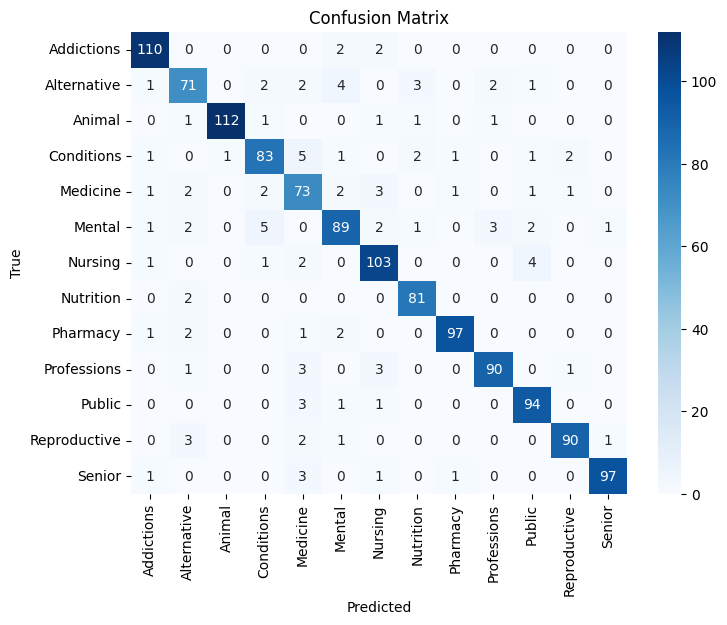

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Adquire predições and labels
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

# Calcula Acurácia
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Calcula F1-score (micro and macro)
f1_micro = f1_score(true_labels, predicted_labels, average='micro')
f1_macro = f1_score(true_labels, predicted_labels, average='macro')
print(f"F1 Score (Micro): {f1_micro:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")

# Matrix de confusão
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plota resultado
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()